In [214]:
%pip install --upgrade pip
%pip install keras
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [251]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils

In [282]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/1032452285/OneDrive - Camara de Comercio de Bogota/Documentos - Gestión Analítica VFE/Solicitudes/Modelo de segmentación/base_entrenamiento_2021_22.csv')

print(df.head())
print(df.shape)
print(df.columns)

                              NOMBRE  NUM_MATRICULA  NUM_ID  DocumentoEmpresa  \
0           HORACIO  RODRIGUEZ LOPEZ        1232815  226391            226391   
1  MAURICIO SEBASTIAN CORONEL CHANGO        3268235  315000            315000   
2                JUDITH TELLO ACOSTA        2630809  351094            351094   
3            VICTOR MANUEL NIÑO RUIZ        2738322  413177            413177   
4   HERNANDEZ HERNANDEZ JAIME EMILIO        2813451  415485            415485   

  DocumentoUsuario iniciativa                            Usuario      iddx  \
0          2263916        NaN            HORACIO RODRIGUEZ LOPEZ  259209.0   
1           315000        NaN  MAURICIO SEBASTIAN CORONEL CHANGO  256521.0   
2           351094        NaN                JUDITH TELLO ACOSTA  254835.0   
3           413177        NaN            VICTOR MANUEL NIÑO RUIZ  260524.0   
4           415485        NaN             VICTOR MARTINEZ CASTRO  263142.0   

   ULT_ANO_RENOVA  AÑOS_FUNCIONAMIENTO  ... 

In [283]:
#df = df.drop('Unnamed: 0', axis=1)
df= df.drop (['NOMBRE','iddx','Usuario','DocumentoUsuario','DocumentoEmpresa',
'NUM_ID','iniciativa','lnING_ACT_ORD2014','lnING_ACT_ORD2023','lnING_ACT_ORD2011',
'lnING_ACT_ORD2012','lnING_ACT_ORD2013','lnING_ACT_ORD2010','lnING_ACT_ORD2015','lnACTIVO2023','lnUTIL_OPERA2022',
'lnING_ACT_ORD2016','lnING_ACT_ORD2017','lnING_ACT_ORD2018','lnACTIVO2018','lnACTIVO2017','lnACTIVO2016','lnACTIVO2015',
'lnACTIVO2014','lnACTIVO2013','lnACTIVO2011','lnACTIVO2010','lnACTIVO2012','lnACTIVO_CORRIENTE','CIIUFINAL','Sector_CCB','ORG_JURIDICA','ULT_ANO_RENOVA'], axis=1)
df = df[df.programa != 2]
print(df.head())
print(df.shape)



   NUM_MATRICULA  AÑOS_FUNCIONAMIENTO  PERSONAL2022  ACTIVO_CORRIENTE  \
0        1232815                   19             1         1500000.0   
1        3268235                    1             3         7303929.0   
2        2630809                    6             1         1000000.0   
3        2738322                    5             0         1800000.0   
4        2813451                    5             0         2000000.0   

   seccion  ESTADO_RENOVACION  TIPO_CATEGORIA  tamano  ciudad  \
0        3                  3               1       1       0   
1        7                  3               1       1       0   
2        3                  3               1       1       0   
3        7                  3               1       1       1   
4       18                  2               1       1       1   

   lnproductividad  lnliquidez  ACTIVO_predicho  ING_ACT_ORD_predicho  \
0         0.000000    0.628609        -65606144             -72154112   
1         3.499916    2.

In [284]:
df=df.drop_duplicates(subset=['NUM_MATRICULA'])
df.describe().applymap('{:,.2f}'.format)

,NUM_MATRICULA,AÑOS_FUNCIONAMIENTO,PERSONAL2022,ACTIVO_CORRIENTE,seccion,ESTADO_RENOVACION,TIPO_CATEGORIA,tamano,ciudad,lnproductividad,lnliquidez,ACTIVO_predicho,ING_ACT_ORD_predicho,lnACTIVO2022,lnACTIVO_predicho,lnPATRIMONIO2022,lnING_ACT_ORD2022,lnING_ACT_ORD_predicho,programa
count,"4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00","4,416.00"
mean,"2,244,421.97",10.98,51.95,"5,769,461,397.87",7.77,2.91,1.68,1.57,0.13,0.90,0.49,"6,338,239,885.45","3,089,012,291.81",16.55,10.69,14.92,14.38,8.49,0.35
std,"964,058.07",10.71,327.20,"67,965,282,176.62",4.25,0.49,0.47,0.83,0.34,1.04,0.91,"124,522,739,436.82","44,394,731,924.80",7.14,10.33,7.93,9.60,10.26,0.48
min,340.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,-8.55,-6.60,"-267,796,480.00","-1,199,137,095,680.00",0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,623,266.75",3.00,0.00,"2,300,000.00",3.00,3.00,1.00,1.00,0.00,0.00,0.00,"-41,715,072.00","-86,128,640.00",14.40,0.00,13.82,0.00,0.00,0.00
50%,"2,468,365.00",8.00,3.00,"111,629,489.50",7.00,3.00,2.00,1.00,0.00,0.72,0.29,"1,506,304.00",0.00,18.55,14.23,17.47,19.05,0.00,0.00
75%,"3,049,962.25",15.00,18.00,"1,470,630,081.75",10.00,3.00,2.00,2.00,0.00,1.63,0.88,"1,046,209,920.00","761,134,752.00",21.52,20.77,20.64,21.81,20.45,1.00
max,"3,549,505.00",50.00,"11,988.00","2,754,051,000,000.00",20.00,7.00,2.00,4.00,1.00,8.23,8.29,"7,638,155,264,000.00","2,285,321,060,352.00",30.07,29.66,28.43,29.84,28.46,1.00


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4416 entries, 0 to 4697
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_MATRICULA           4416 non-null   int64  
 1   AÑOS_FUNCIONAMIENTO     4416 non-null   int64  
 2   PERSONAL2022            4416 non-null   int64  
 3   ACTIVO_CORRIENTE        4416 non-null   float64
 4   seccion                 4416 non-null   int64  
 5   ESTADO_RENOVACION       4416 non-null   int64  
 6   TIPO_CATEGORIA          4416 non-null   int64  
 7   tamano                  4416 non-null   int64  
 8   ciudad                  4416 non-null   int64  
 9   lnproductividad         4416 non-null   float64
 10  lnliquidez              4416 non-null   float64
 11  ACTIVO_predicho         4416 non-null   int64  
 12  ING_ACT_ORD_predicho    4416 non-null   int64  
 13  lnACTIVO2022            4416 non-null   float64
 14  lnACTIVO_predicho       4416 non-null   

,AÑOS_FUNCIONAMIENTO,PERSONAL2022,seccion,ESTADO_RENOVACION,TIPO_CATEGORIA,tamano,ciudad,lnproductividad,lnliquidez,lnACTIVO2022,lnACTIVO_predicho,lnPATRIMONIO2022,lnING_ACT_ORD2022,lnING_ACT_ORD_predicho
AÑOS_FUNCIONAMIENTO,1.0,29430.0,22136.0,11465.0,7089.0,6706.0,538.0,3826.2,2071.7,38533.0,29793.1,36260.7,34948.2,25744.7
PERSONAL2022,29430.0,1.0,15492.0,7846.0,5373.0,5449.0,324.0,3488.1,1681.5,35354.8,32025.0,33334.6,35043.7,25010.2
seccion,22136.0,15492.0,1.0,12644.0,7372.0,6819.0,578.0,3891.2,2123.7,29574.1,17494.9,27153.8,24091.1,13602.4
ESTADO_RENOVACION,11465.0,7846.0,12644.0,1.0,7419.0,6733.0,578.0,3868.0,2070.6,11330.4,6966.0,10433.0,9344.0,5484.0
TIPO_CATEGORIA,7089.0,5373.0,7372.0,7419.0,1.0,6104.0,578.0,3396.1,1896.8,6638.0,4488.0,6171.0,5706.0,3533.0
tamano,6706.0,5449.0,6819.0,6733.0,6104.0,1.0,578.0,3283.7,1689.4,6315.0,4760.0,5963.0,5585.0,3665.0
ciudad,538.0,324.0,578.0,578.0,578.0,578.0,1.0,178.8,-150.7,502.0,266.0,464.0,369.0,207.0
lnproductividad,3826.2,3488.1,3891.2,3868.0,3396.1,3283.7,178.8,1.0,1207.5,3957.9,3059.6,3779.2,3959.0,2329.7
lnliquidez,2071.7,1681.5,2123.7,2070.6,1896.8,1689.4,-150.7,1207.5,1.0,1995.7,1428.3,1948.3,1917.5,1105.9
lnACTIVO2022,38533.0,35354.8,29574.1,11330.4,6638.0,6315.0,502.0,3957.9,1995.7,1.0,47162.5,65876.7,61550.4,37049.0


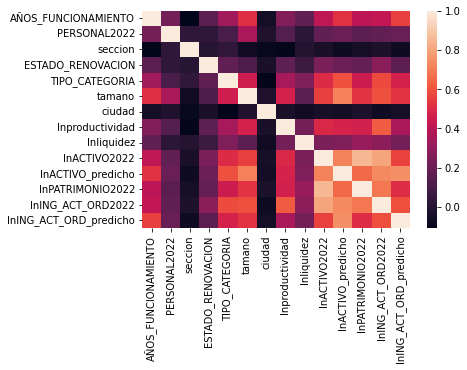

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt
df_snm=df.drop(['NUM_MATRICULA','ACTIVO_CORRIENTE','ACTIVO_predicho','programa','ING_ACT_ORD_predicho'], axis=1)
corr=df_snm.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df_snm.corr(method=histogram_intersection)


In [287]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

In [288]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['programa','NUM_MATRICULA'], axis=1).values
Y = df['programa']
X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_Train.shape)
print(Y_Train.shape)

(3091, 17)
(3091,)


In [290]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Logistic Regression

[[738 101]
 [132 354]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       839
           1       0.78      0.73      0.75       486

    accuracy                           0.82      1325
   macro avg       0.81      0.80      0.81      1325
weighted avg       0.82      0.82      0.82      1325



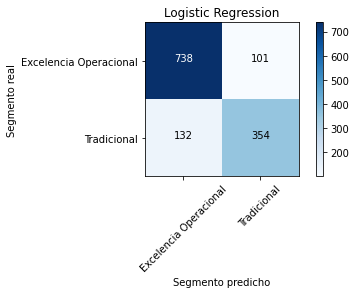

In [291]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))
def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictions)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Logistic Regression')

Random Forest

[[741  98]
 [128 358]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       839
           1       0.79      0.74      0.76       486

    accuracy                           0.83      1325
   macro avg       0.82      0.81      0.81      1325
weighted avg       0.83      0.83      0.83      1325



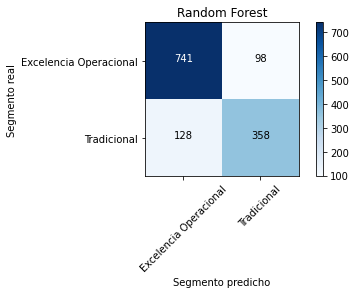

In [292]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictionforest)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Random Forest')

Support Vector Machines

[[744  95]
 [139 347]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       839
           1       0.79      0.71      0.75       486

    accuracy                           0.82      1325
   macro avg       0.81      0.80      0.81      1325
weighted avg       0.82      0.82      0.82      1325



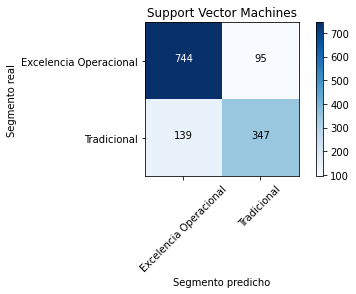

In [293]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictionsvm)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Support Vector Machines')

Decision Tree

[[687 152]
 [153 333]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       839
           1       0.69      0.69      0.69       486

    accuracy                           0.77      1325
   macro avg       0.75      0.75      0.75      1325
weighted avg       0.77      0.77      0.77      1325



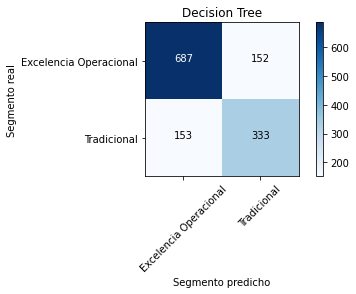

In [294]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictionstree)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Decision Tree')

Linear Discriminant Anaylsis

[[740  99]
 [146 340]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       839
           1       0.77      0.70      0.74       486

    accuracy                           0.82      1325
   macro avg       0.80      0.79      0.80      1325
weighted avg       0.81      0.82      0.81      1325



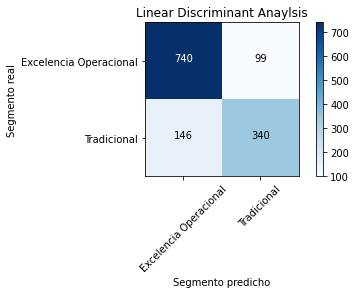

In [295]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))
def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictionlda)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Linear Discriminant Anaylsis')

Naive Bayes

[[540 299]
 [ 19 467]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       839
           1       0.61      0.96      0.75       486

    accuracy                           0.76      1325
   macro avg       0.79      0.80      0.76      1325
weighted avg       0.84      0.76      0.76      1325



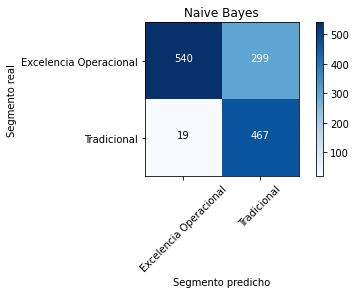

In [296]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

def plot_confusion_matrix(cm, classes=["Excelencia Operacional", "Tradicional"], title="",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]): 
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Segmento real')
    plt.xlabel('Segmento predicho')

cm_plot = confusion_matrix(Y_Test,predictionnb)

plt.figure()
plot_confusion_matrix(cm_plot, title = 'Naive Bayes')

Predicción de la base completa

In [297]:
dfc = pd.read_csv('C:/Users/1032452285/OneDrive - Camara de Comercio de Bogota/Documentos - Gestión Analítica VFE/Solicitudes/Modelo de segmentación/base_predicción_2021_22.csv')
dfc= dfc.drop (['NOMBRE','iddx','Usuario','DocumentoUsuario','DocumentoEmpresa',
'NUM_ID','iniciativa','lnING_ACT_ORD2014','lnING_ACT_ORD2023','lnING_ACT_ORD2011',
'lnING_ACT_ORD2012','lnING_ACT_ORD2013','lnING_ACT_ORD2010','lnING_ACT_ORD2015','lnACTIVO2023','lnUTIL_OPERA2022',
'lnING_ACT_ORD2016','lnING_ACT_ORD2017','lnING_ACT_ORD2018','lnACTIVO2018','lnACTIVO2017','lnACTIVO2016','lnACTIVO2015',
'lnACTIVO2014','lnACTIVO2013','lnACTIVO2011','lnACTIVO2010','lnACTIVO2012','lnACTIVO_CORRIENTE','programa','CIIUFINAL',
'Sector_CCB','ORG_JURIDICA','ULT_ANO_RENOVA'], axis=1)
dfc.describe().applymap('{:,.2f}'.format)
#revisar NaN

,NUM_MATRICULA,AÑOS_FUNCIONAMIENTO,PERSONAL2022,ACTIVO_CORRIENTE,seccion,ESTADO_RENOVACION,TIPO_CATEGORIA,tamano,ciudad,lnproductividad,lnliquidez,ACTIVO_predicho,ING_ACT_ORD_predicho,lnACTIVO2022,lnACTIVO_predicho,lnPATRIMONIO2022,lnING_ACT_ORD2022,lnING_ACT_ORD_predicho
count,"665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00"
mean,"2,617,940.25",7.10,7.49,"1,913,493,758.18",8.91,2.94,1.42,1.07,0.14,0.29,0.27,"2,558,798,906.55","650,006,953.27",9.97,3.02,8.89,5.36,2.29
std,"801,589.57",7.80,"1,254.67","257,107,516,390.50",4.32,0.88,0.49,0.34,0.34,0.81,0.95,"292,789,334,088.80","161,434,371,948.00",8.29,7.00,8.27,8.41,6.22
min,6.00,0.00,0.00,"-38,161,000.00",1.00,1.00,1.00,1.00,0.00,-19.04,-21.92,"-1,337,752,289,280.00","-92,398,050,869,248.00",0.00,0.00,0.00,0.00,0.00
25%,"2,198,714.50",2.00,0.00,"1,200,000.00",7.00,3.00,1.00,1.00,0.00,0.00,0.00,"-65,292,288.00","-84,202,496.00",0.00,0.00,0.00,0.00,0.00
50%,"2,855,771.50",4.00,0.00,"2,160,000.00",7.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,13.82,0.00,0.00
75%,"3,240,565.75",10.00,1.00,"19,000,000.00",13.00,3.00,2.00,1.00,0.00,0.00,0.08,0.00,0.00,16.12,0.00,15.61,14.51,0.00
max,"3,549,659.00",50.00,"800,000.00","108,505,539,537,891.00",21.00,8.00,2.00,4.00,1.00,20.75,18.62,"121,674,099,851,264.00","80,477,159,424,000.00",32.78,32.43,31.90,31.99,32.02


In [298]:
dfc=dfc.dropna()
dfc=dfc.drop_duplicates(subset=['NUM_MATRICULA'])
dfc.describe().applymap('{:,.2f}'.format)

,NUM_MATRICULA,AÑOS_FUNCIONAMIENTO,PERSONAL2022,ACTIVO_CORRIENTE,seccion,ESTADO_RENOVACION,TIPO_CATEGORIA,tamano,ciudad,lnproductividad,lnliquidez,ACTIVO_predicho,ING_ACT_ORD_predicho,lnACTIVO2022,lnACTIVO_predicho,lnPATRIMONIO2022,lnING_ACT_ORD2022,lnING_ACT_ORD_predicho
count,"665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00"
mean,"2,617,940.25",7.10,7.49,"1,913,493,758.18",8.91,2.94,1.42,1.07,0.14,0.29,0.27,"2,558,798,906.55","650,006,953.27",9.97,3.02,8.89,5.36,2.29
std,"801,589.57",7.80,"1,254.67","257,107,516,390.50",4.32,0.88,0.49,0.34,0.34,0.81,0.95,"292,789,334,088.80","161,434,371,948.00",8.29,7.00,8.27,8.41,6.22
min,6.00,0.00,0.00,"-38,161,000.00",1.00,1.00,1.00,1.00,0.00,-19.04,-21.92,"-1,337,752,289,280.00","-92,398,050,869,248.00",0.00,0.00,0.00,0.00,0.00
25%,"2,198,714.50",2.00,0.00,"1,200,000.00",7.00,3.00,1.00,1.00,0.00,0.00,0.00,"-65,292,288.00","-84,202,496.00",0.00,0.00,0.00,0.00,0.00
50%,"2,855,771.50",4.00,0.00,"2,160,000.00",7.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,13.82,0.00,0.00
75%,"3,240,565.75",10.00,1.00,"19,000,000.00",13.00,3.00,2.00,1.00,0.00,0.00,0.08,0.00,0.00,16.12,0.00,15.61,14.51,0.00
max,"3,549,659.00",50.00,"800,000.00","108,505,539,537,891.00",21.00,8.00,2.00,4.00,1.00,20.75,18.62,"121,674,099,851,264.00","80,477,159,424,000.00",32.78,32.43,31.90,31.99,32.02


In [299]:
#SVM
predictiondfc=trainedsvm.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_svm=pd.DataFrame(predictiondfc,columns=['programa_svm'])
DFC=pd.merge(dfc, pred_svm, left_index=True, right_index=True)
DFC['programa_svm'].value_counts()

0    471221
1    193973
Name: programa_svm, dtype: int64

In [300]:
#Naive Bayes
predictionnb=trainednb.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_nb=pd.DataFrame(predictionnb,columns=['programa_nb'])
DFC=pd.merge(DFC, pred_nb, left_index=True, right_index=True)
DFC['programa_nb'].value_counts()

0    665194
Name: programa_nb, dtype: int64

In [301]:
#Linear Regression
predictionlf=trainedmodel.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_lf=pd.DataFrame(predictionlf,columns=['programa_lf'])
DFC=pd.merge(DFC, pred_lf, left_index=True, right_index=True)
DFC['programa_lf'].value_counts()

0    466272
1    198922
Name: programa_lf, dtype: int64

In [302]:
#Random Forest
predictionrf=trainedforest.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_rf=pd.DataFrame(predictionrf,columns=['programa_forest'])
DFC=pd.merge(DFC, pred_rf, left_index=True, right_index=True)
DFC['programa_forest'].value_counts()

0    665194
Name: programa_forest, dtype: int64

In [303]:
#Decision Tree
predictiontree=trainedtree.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_tree=pd.DataFrame(predictiontree,columns=['programa_tree'])
DFC=pd.merge(DFC, pred_tree, left_index=True, right_index=True)
DFC['programa_tree'].value_counts()

1    465074
0    200120
Name: programa_tree, dtype: int64

In [304]:
#Linear Discriminant Anaylsis
predictionlda=trainedlda.predict(dfc.drop(['NUM_MATRICULA'], axis=1))
pred_lda=pd.DataFrame(predictionlda,columns=['programa_lda'])
DFC=pd.merge(DFC, pred_lda, left_index=True, right_index=True)
DFC['programa_lda'].value_counts()

0    566434
1     98760
Name: programa_lda, dtype: int64

In [305]:
#Retomamos la base original para tomar las variables de identificación

DFCL = pd.read_csv('C:/Users/1032452285/OneDrive - Camara de Comercio de Bogota/Documentos - Gestión Analítica VFE/Solicitudes/Modelo de segmentación/base_predicción_2021_22.csv')
DFCL=DFCL.drop(['iniciativa','lnING_ACT_ORD2014','lnING_ACT_ORD2023','lnING_ACT_ORD2011',
'lnING_ACT_ORD2012','lnING_ACT_ORD2013','lnING_ACT_ORD2010','lnING_ACT_ORD2015','lnACTIVO2023','lnUTIL_OPERA2022',
'lnING_ACT_ORD2016','lnING_ACT_ORD2017','lnING_ACT_ORD2018','lnACTIVO2018','lnACTIVO2017','lnACTIVO2016','lnACTIVO2015',
'lnACTIVO2014','lnACTIVO2013','lnACTIVO2011','lnACTIVO2010','lnACTIVO2012','lnACTIVO_CORRIENTE'], axis=1)
DFCL.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665194 entries, 0 to 665193
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NOMBRE                  665194 non-null  object 
 1   NUM_MATRICULA           665194 non-null  int64  
 2   NUM_ID                  665194 non-null  object 
 3   DocumentoEmpresa        4715 non-null    float64
 4   DocumentoUsuario        4402 non-null    object 
 5   Usuario                 3599 non-null    object 
 6   iddx                    3616 non-null    float64
 7   ULT_ANO_RENOVA          665194 non-null  int64  
 8   AÑOS_FUNCIONAMIENTO     665194 non-null  int64  
 9   PERSONAL2022            665194 non-null  int64  
 10  ACTIVO_CORRIENTE        665194 non-null  float64
 11  seccion                 665194 non-null  int64  
 12  CIIUFINAL               665194 non-null  int64  
 13  ESTADO_RENOVACION       665194 non-null  int64  
 14  TIPO_CATEGORIA      

In [306]:
DFCL=pd.merge(DFCL, DFC, on='NUM_MATRICULA')
DFCL=DFCL.drop_duplicates(subset=['NUM_MATRICULA'])

In [308]:
DFCL.describe().applymap('{:,.2f}'.format)

,NUM_MATRICULA,DocumentoEmpresa,iddx,ULT_ANO_RENOVA,AÑOS_FUNCIONAMIENTO_x,PERSONAL2022_x,ACTIVO_CORRIENTE_x,seccion_x,CIIUFINAL,ESTADO_RENOVACION_x,...,lnACTIVO_predicho_y,lnPATRIMONIO2022_y,lnING_ACT_ORD2022_y,lnING_ACT_ORD_predicho_y,programa_svm,programa_nb,programa_lf,programa_forest,programa_tree,programa_lda
count,"665,194.00","4,715.00","3,616.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00",...,"665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00","665,194.00"
mean,"2,617,940.25","4,680,032,245.87","249,912.16","2,021.27",7.10,7.49,"1,913,493,758.18",8.91,"5,353.55",2.94,...,3.02,8.89,5.36,2.29,0.29,0.00,0.30,0.00,0.70,0.15
std,"801,589.57","4,087,584,553.55","15,867.84",1.06,7.80,"1,254.67","257,107,516,390.50",4.32,"2,114.16",0.88,...,7.00,8.27,8.41,6.22,0.45,0.00,0.46,0.00,0.46,0.36
min,6.00,"226,391.00","80,466.00","2,019.00",0.00,0.00,"-38,161,000.00",1.00,111.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,198,714.50","900,649,722.50","247,607.75","2,021.00",2.00,0.00,"1,200,000.00",7.00,"4,631.00",3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,855,771.50","1,143,862,609.00","253,315.00","2,022.00",4.00,0.00,"2,160,000.00",7.00,"4,773.00",3.00,...,0.00,13.82,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,240,565.75","9,003,806,149.50","258,681.25","2,022.00",10.00,1.00,"19,000,000.00",13.00,"6,910.00",3.00,...,0.00,15.61,14.51,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,"3,549,659.00","9,014,713,218.00","263,808.00","2,022.00",50.00,"800,000.00","108,505,539,537,891.00",21.00,"9,900.00",8.00,...,32.43,31.90,31.99,32.02,1.00,0.00,1.00,0.00,1.00,1.00


In [309]:
DFCL.to_csv("C:/Users/1032452285/OneDrive - Camara de Comercio de Bogota/Documentos - Gestión Analítica VFE/Solicitudes/Modelo de segmentación/base_resultado_2021_22.csv") 